Thursday, September 7, 2023

Running through the sample code found [here](https://pypi.org/project/DeepImageSearch/)

In [2]:
from DeepImageSearch import Load_Data, Search_Setup


In [3]:
imageFolder = '../FaceNetPyTorch/data/lfw/images'
imageFolder = '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images'

In [4]:

# Load images from a folder
image_list = Load_Data().from_folder([imageFolder])

In [5]:
# Set up the search engine, You can load 'vit_base_patch16_224_in21k', 'resnet50' etc more then 500+ models 
st = Search_Setup(image_list=image_list, model_name='vgg19', pretrained=True, image_count=10000)


 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: vgg19


This next cell will prompt above and ask "Metadata and Features are already present, Do you want Extract Again? Enter yes or no" to rerun the index. IF you pointed to a different folder, then, yeah, redo it .. 

Also, it currently runs on the cpu, grabbing all 8 and utilizing almost %100 on all of them ... I bet this would be wayy faster from the gpu! ... so gonna give that a go ...

Also, this saves the metadata to a 'metadata-files/vgg19/image_data_features.pkl' and 'metadata-files/vgg19/image_features_vectors.idx' file. 

Don't run the next cell if you simply want to use the existing feature vectors!

In [5]:
%%time
# Index the images
st.run_index()

# Running on 8 CPU's at almost %100 ...
# CPU times: user 2h 54min 33s, sys: 27min 48s, total: 3h 22min 21s
# Wall time: 29min 21s

100%|██████████| 8574/8574 [28:28<00:00,  5.02it/s]


 Image Meta Information Saved: [metadata-files/vgg19/image_data_features.pkl]
 Saved The Indexed File:[metadata-files/vgg19/image_features_vectors.idx]
CPU times: user 2h 49min 40s, sys: 23min 33s, total: 3h 13min 13s
Wall time: 28min 29s


In [7]:
# Get metadata
metadata = st.get_image_metadata_file()

In [ ]:
# Add new images to the index
# st.add_images_to_index(['../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0001.jpg', '../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0008.jpg'])


In [8]:
# Get similar images
searchImage = '../FaceNetPyTorch/data/test_images/angelina_jolie/1.jpg'
searchImage = '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images/ko1yxtyDnBYUnshNvpaiAw2/df2d5f53-5683-ed11-90fd-f40343f49558.jpeg'
# searchImage = '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images/ko1yxtyDnBYUnshNvpaiAw2/7c448d84-0783-ed11-90fd-f40343f49558.jpeg'

st.get_similar_images(image_path=searchImage, number_of_images=10)


{6444: '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images/ko1yxtyDnBYUnshNvpaiAw2/df2d5f53-5683-ed11-90fd-f40343f49558.jpeg',
 7007: '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images/2nggq9pJ7QdFAIOD0_l0vw2/b8a4bb88-ea0e-ee11-9101-f40343f42de0.jpeg',
 6927: '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images/LKo3zDqTMqlewVmzCksCtQ2/77d9e5d2-dcff-eb11-910f-a0369ff9d0f5.jpeg',
 3036: '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images/FcdeToS2l7Gg5XLLWeWrGw2/6b32e8fd-bc2d-ee11-9101-f40343f49558.jpeg',
 3906: '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images/VrKhTeiDVI07zFDxk9YqlA2/4afd00a0-241d-ee11-9101-f40343f49558.jpeg',
 3378: '/tf/All/Data/Documents/Github/rkaunismaa/NLP4HTML/express/express-match/public/images/QloC9dtJL-hGsF6LIFs8nw2/daea1c6b-d5ca-ed11-90ff-f40343f42de8.jpeg',
 1010: '/tf/All/Data/Documen

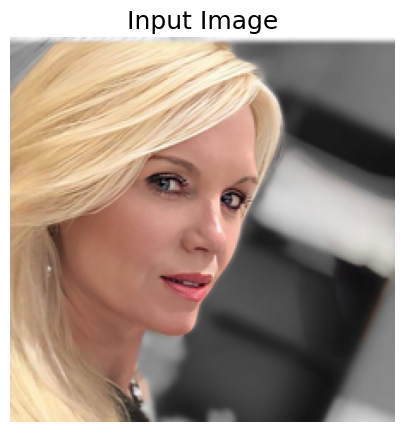

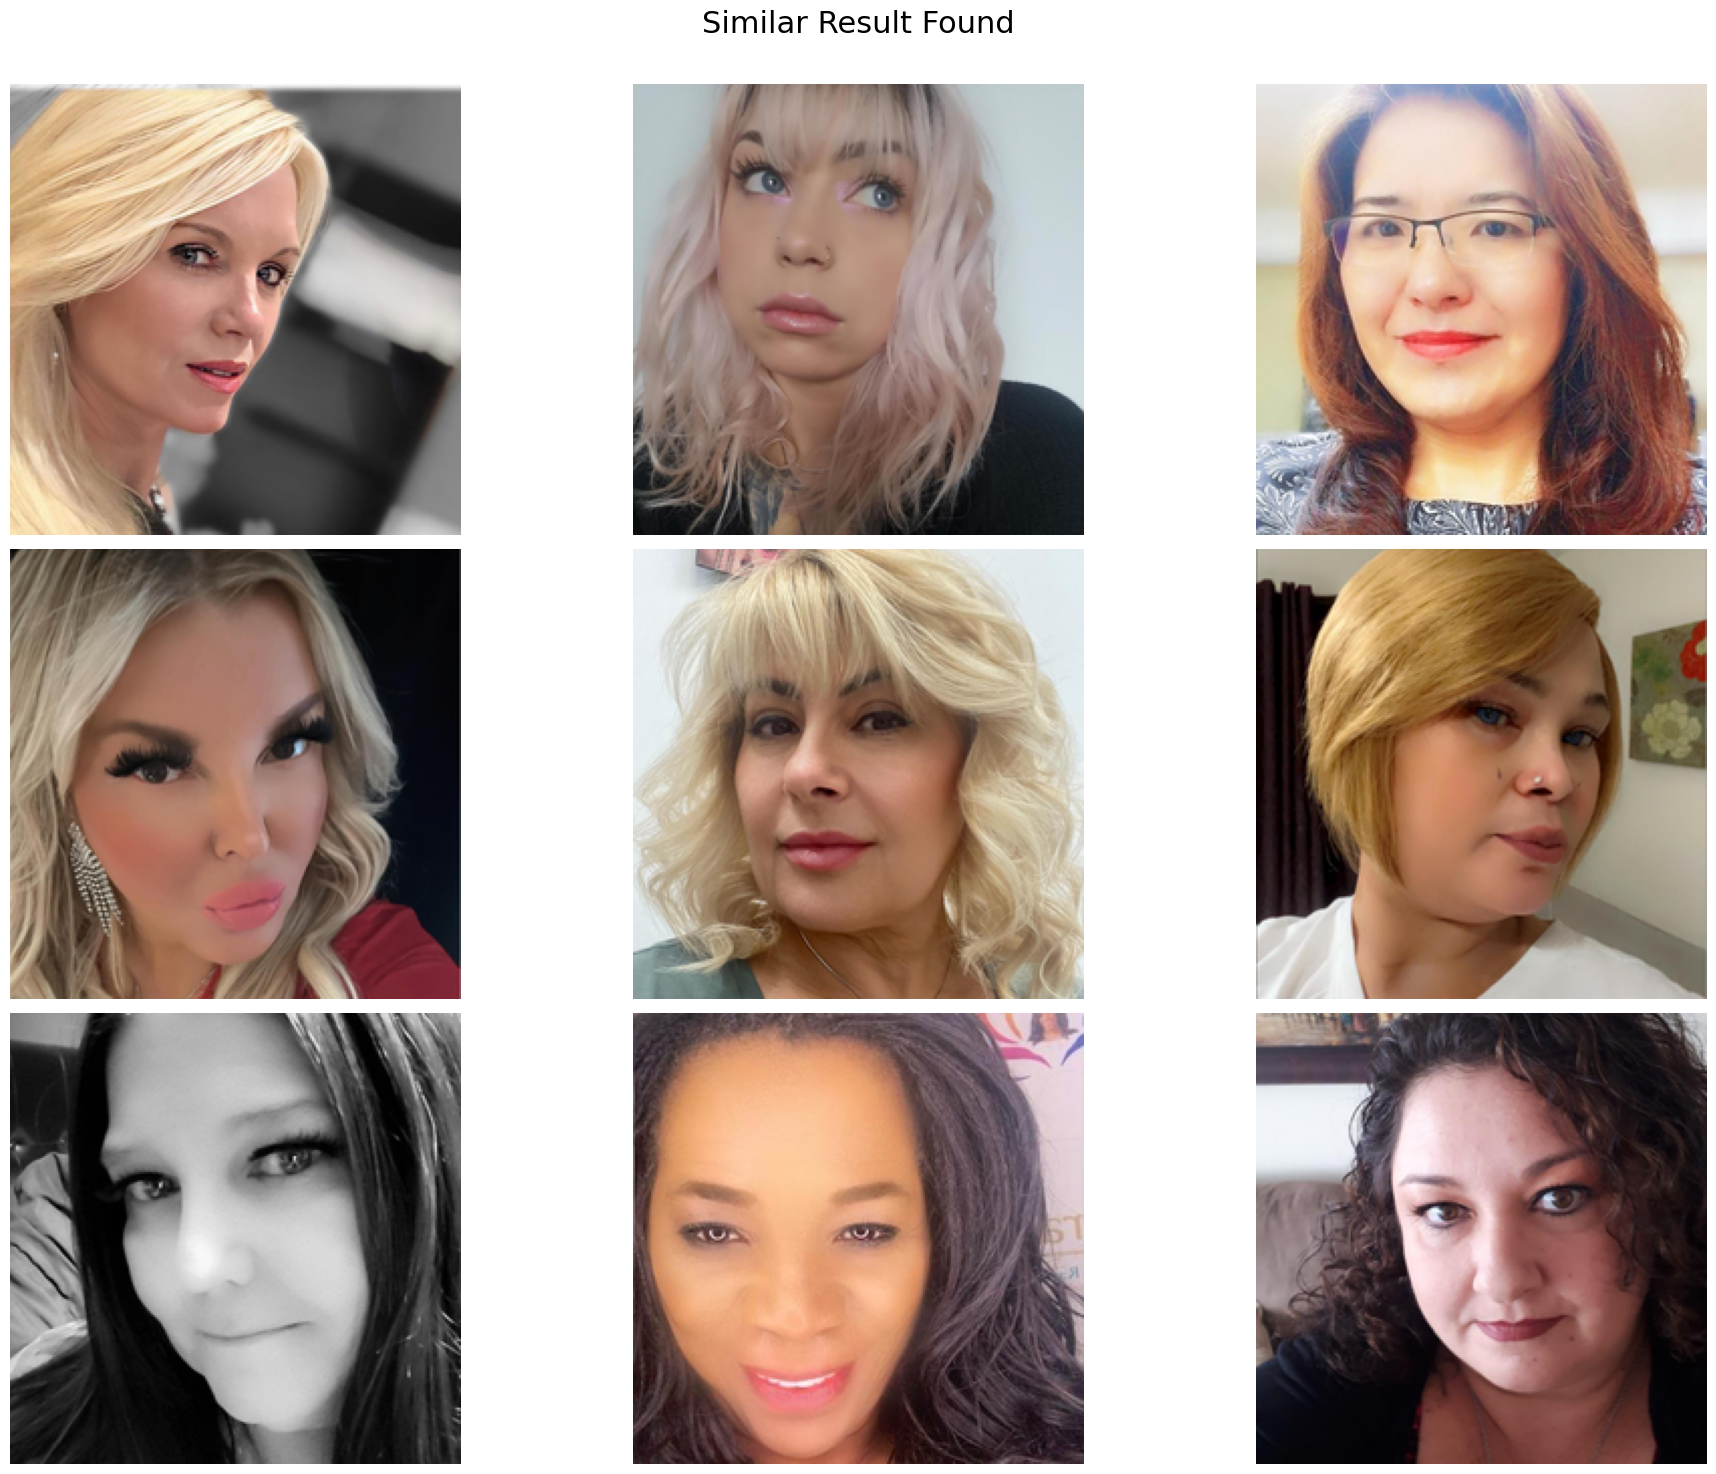

In [9]:
# Plot similar images
st.plot_similar_images(image_path=searchImage, number_of_images=9)
